# 1. Importación de Librerías

In [844]:
# System

# Data manipulation
import cv2
import numpy as np

# Model

# Plot

# Profiling

# Utility
import Utils as U

# 2. Definicion de globales

In [845]:
# None

# 3. Definición de Constantes

In [846]:
INPUT_IMAGE_PATH_COVID      =   "data/Covid19-dataset/train/Covid/COVID-00038.jpg"
INPUT_IMAGE_PATH_NORMAL     =   "data/Covid19-dataset/train/Normal/097.jpeg"
INPUT_IMAGE_PATH_PNEUMONIA  =   "data/Covid19-dataset/train/Viral Pneumonia/096.jpeg"


# Imágenes originales

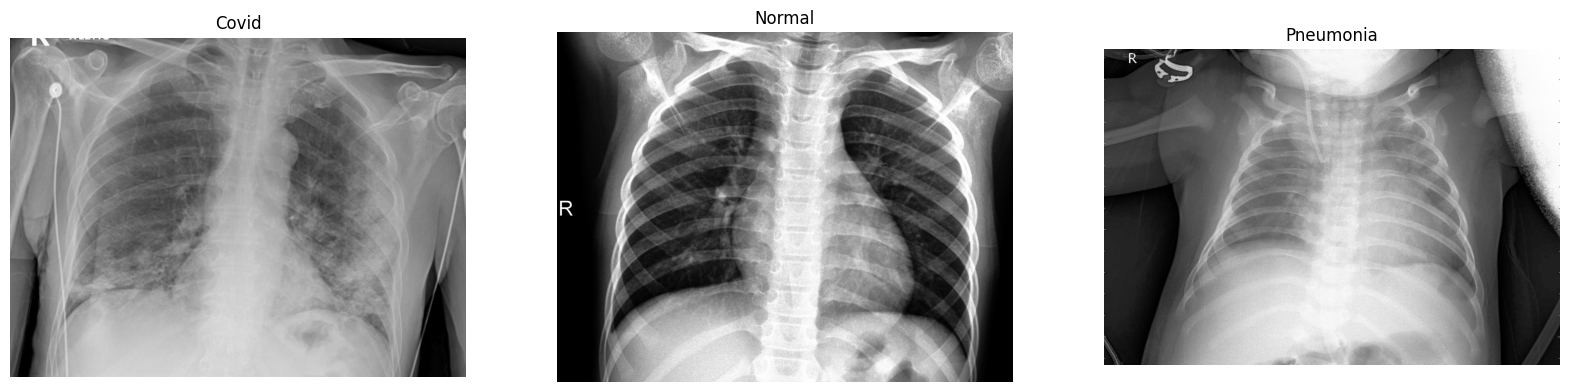

In [847]:
original_C_img = cv2.imread(INPUT_IMAGE_PATH_COVID)
original_N_img = cv2.imread(INPUT_IMAGE_PATH_NORMAL)
original_P_img = cv2.imread(INPUT_IMAGE_PATH_PNEUMONIA)

U.show_3_imgs(img1=original_C_img, name1="Covid", img2=original_N_img, name2="Normal", img3=original_P_img, name3="Pneumonia", width=20)

# Filtros

## Simple Blur

In [848]:
# Some kernel (must be an odd number)
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
print(kernel)

[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


In [849]:
# Perform the convolution
filtered_C_image = cv2.filter2D(original_C_img, -1, kernel)
filtered_N_image = cv2.filter2D(original_N_img, -1, kernel)
filtered_P_image = cv2.filter2D(original_P_img, -1, kernel)

# Save pic (optional)
# output_image_path = 'processed_1.jpg'
# cv2.imwrite(output_image_path, grayscale_img)

### Original

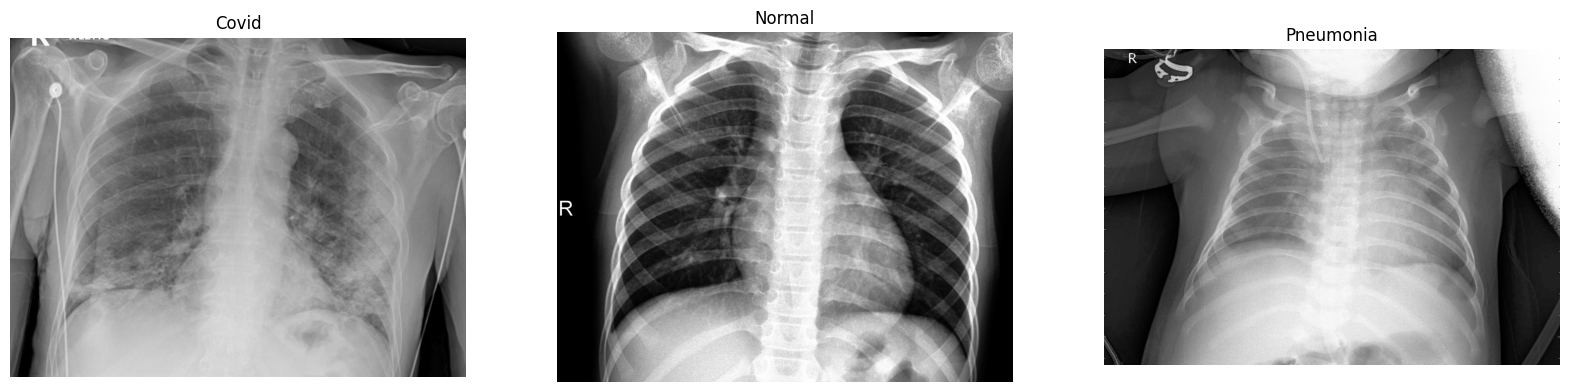

In [850]:
U.show_3_imgs(img1=original_C_img, name1="Covid", img2=original_N_img, name2="Normal", img3=original_P_img, name3="Pneumonia", width=20)

### Con filtro

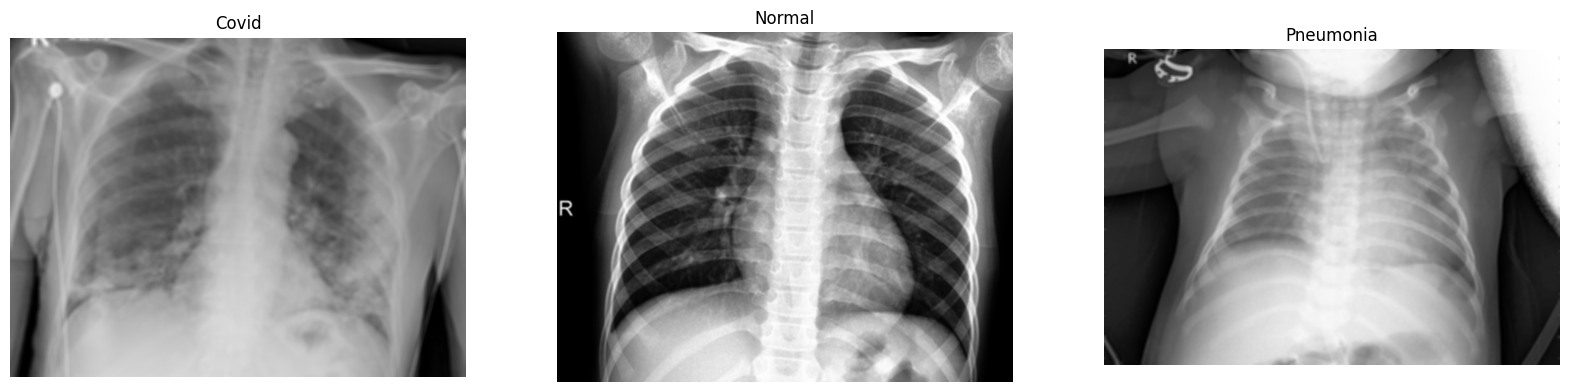

In [851]:
U.show_3_imgs(img1=filtered_C_image, name1="Covid", img2=filtered_N_image, name2="Normal", img3=filtered_P_image, name3="Pneumonia", width=20)

### Con otro kernel

In [852]:
kernel_size = 21
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)

filtered_C_image = cv2.filter2D(original_C_img, -1, kernel)
filtered_N_image = cv2.filter2D(original_N_img, -1, kernel)
filtered_P_image = cv2.filter2D(original_P_img, -1, kernel)

#### Original

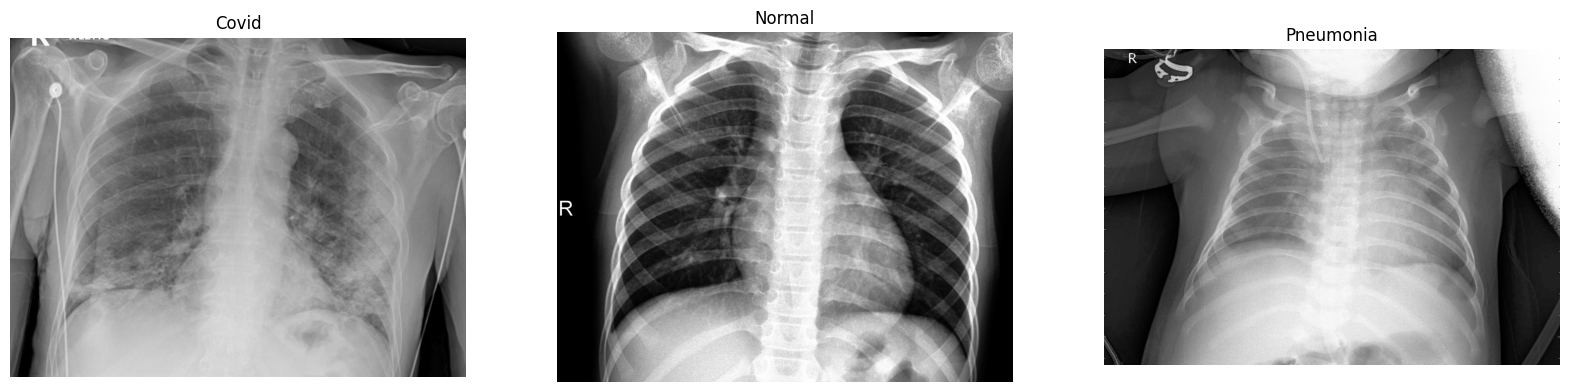

In [853]:
U.show_3_imgs(img1=original_C_img, name1="Covid", img2=original_N_img, name2="Normal", img3=original_P_img, name3="Pneumonia", width=20)

#### Con filtro

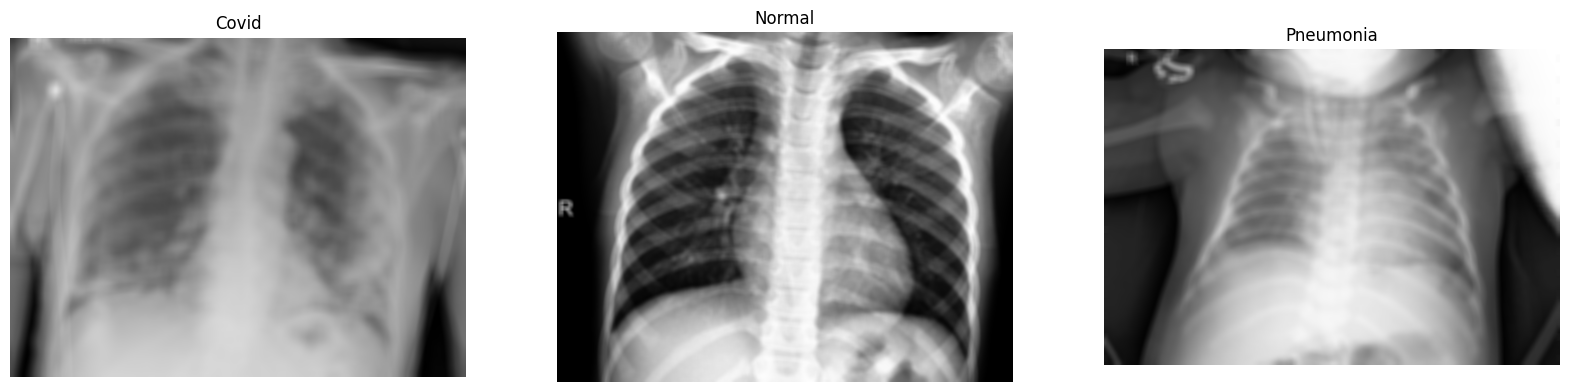

In [854]:
U.show_3_imgs(img1=filtered_C_image, name1="Covid", img2=filtered_N_image, name2="Normal", img3=filtered_P_image, name3="Pneumonia", width=20)


Diferencias observadas:
Es posible apreciar una disminución de la nitidez de la imagen.

## Gaussian Blurring

In [855]:
# Syntax: cv.getGaussianKernel(ksize, sigma[, ktype])
# Parameters:
#     Ksize: It is the Aperture size. Ksize value should be odd and positive.
#     sigma: Sigma is the Gaussian standard deviation. It is computed from ksize as sigma = 0.3*((ksize-1)*0.5 – 1) + 0.8 if it is non-positive.
#     ktype: It is the type of filter coefficients. It can be CV_32F or CV_64F.

order = 11
sigma = 11

# gaussian_kernel = cv2.getGaussianKernel(order, sigma)
# print(gaussian_kernel)
# gaussian_filtered_image = cv2.filter2D(grayscale_img, -1, gaussian_kernel)

gaussian_C_img = cv2.GaussianBlur(original_C_img,(order,order),sigma)
gaussian_N_img = cv2.GaussianBlur(original_N_img,(order,order),sigma)
gaussian_P_img = cv2.GaussianBlur(original_P_img,(order,order),sigma)



### Original

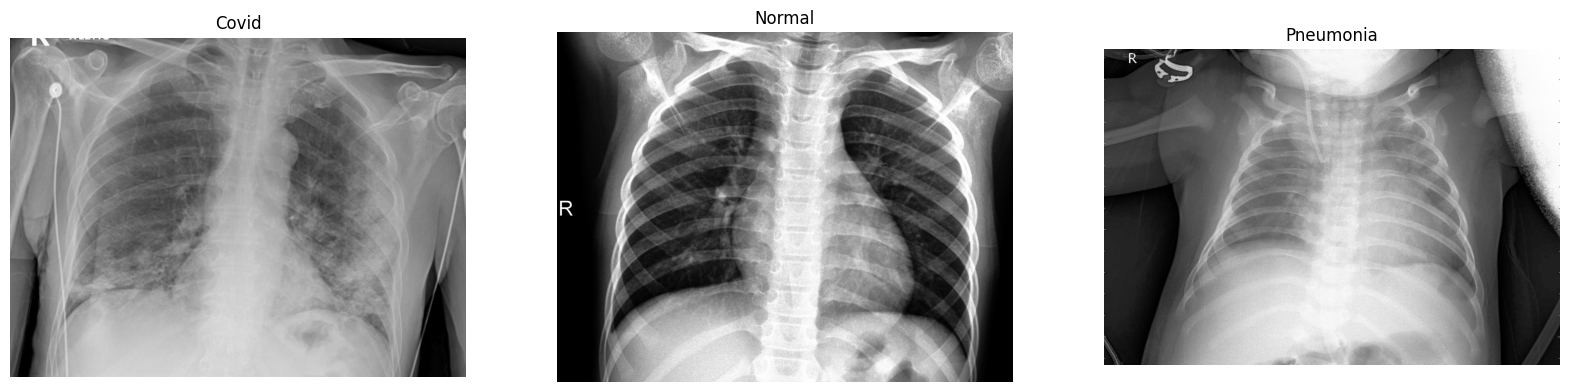

In [856]:
U.show_3_imgs(img1=original_C_img, name1="Covid", img2=original_N_img, name2="Normal", img3=original_P_img, name3="Pneumonia", width=20)

### Con filtro

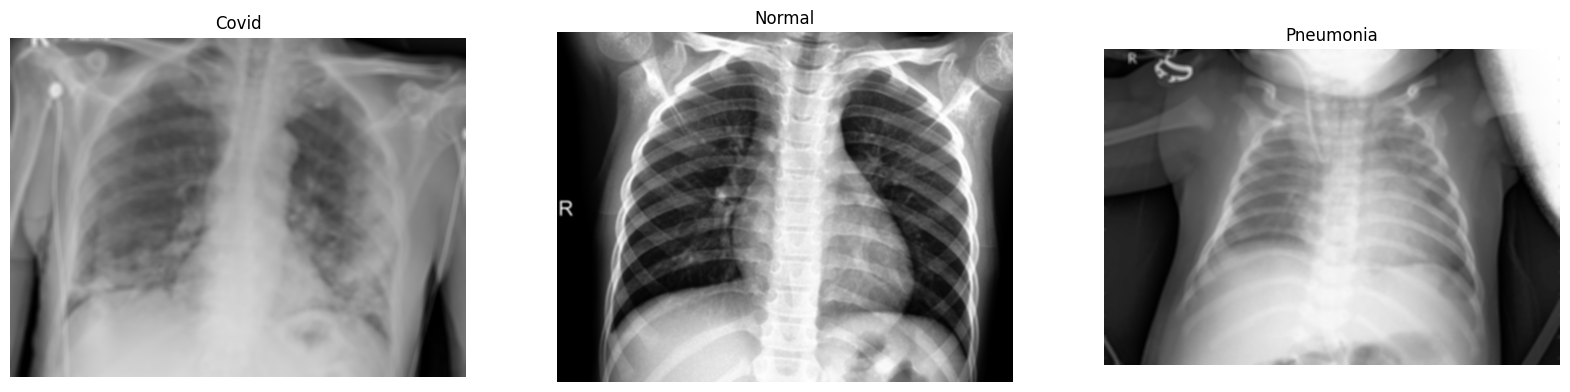

In [857]:
U.show_3_imgs(img1=gaussian_C_img, name1="Covid", img2=gaussian_N_img, name2="Normal", img3=gaussian_P_img, name3="Pneumonia", width=20)

Diferencias observadas:
Es posible apreciar una disminución de la nitidez de la imagen.

## Sobel con distintos parámetros

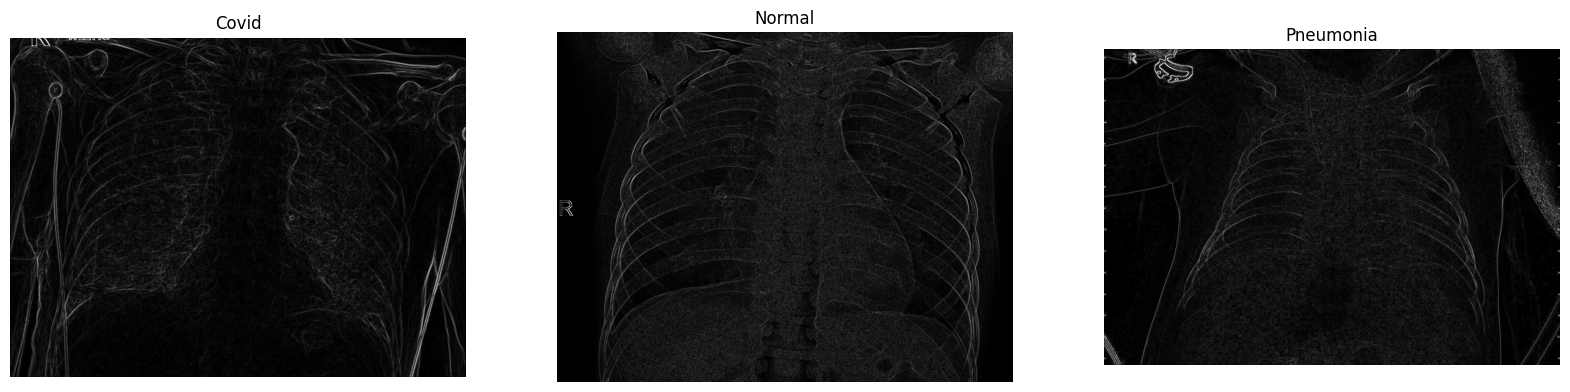

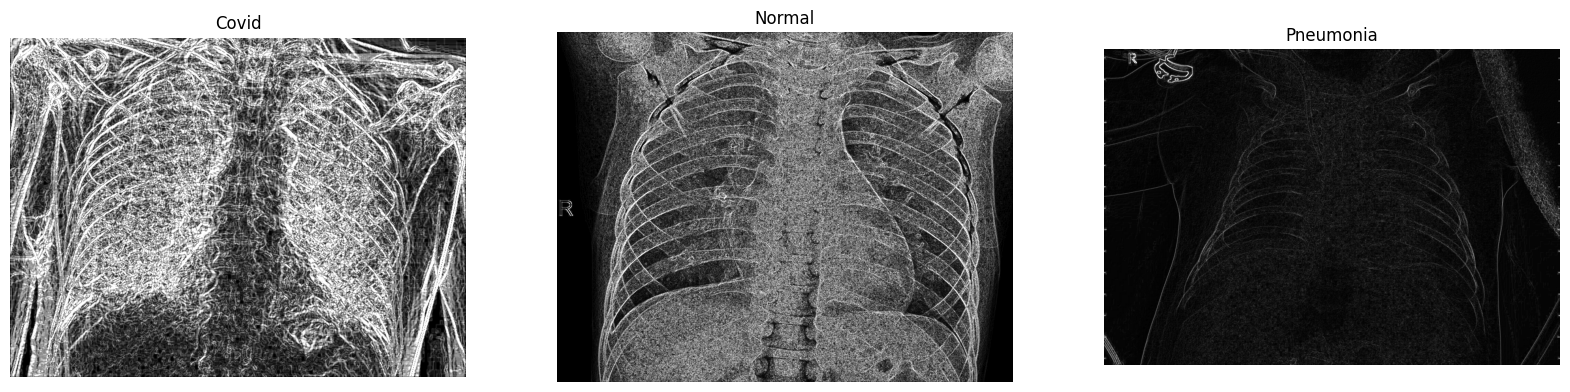

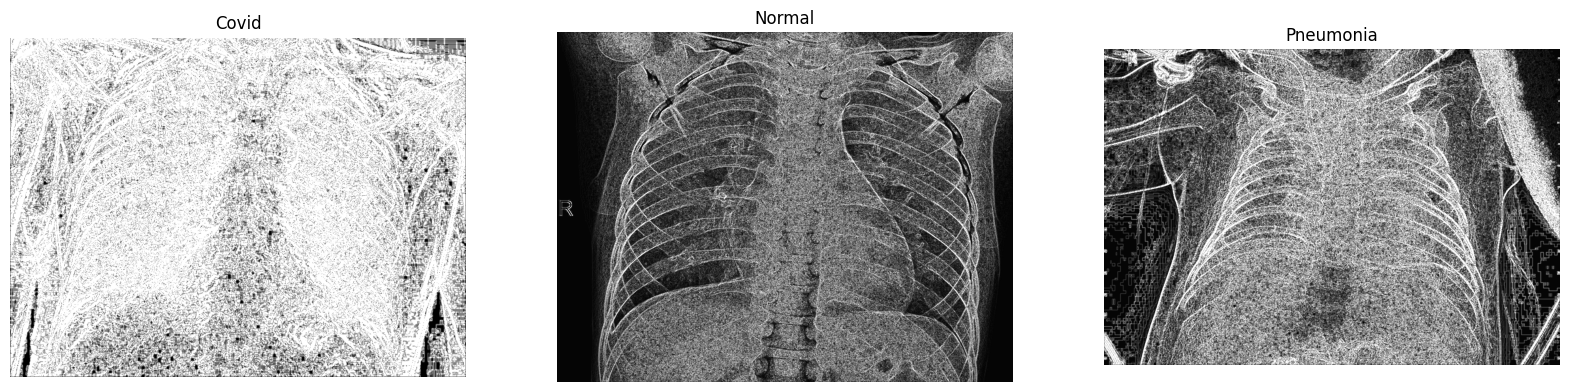

In [858]:
def raw_sobel_filter(img, ddepth=cv2.CV_16S, ksize=3, scale=1, delta=0):
    grad_x = cv2.Sobel(img, ddepth, 1, 0, ksize=ksize, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(img, ddepth, 0, 1, ksize=ksize, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    return cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

def sobel_filter(img, ddepth=cv2.CV_16S, ksize=3, scale=1, delta=0):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = raw_sobel_filter(img, ddepth=cv2.CV_16S, ksize=ksize, scale=scale, delta=delta)
    return img



sobel_C_img = sobel_filter(original_C_img, ksize=3, scale=1, delta=0)
sobel_N_img = sobel_filter(original_N_img, ksize=3, scale=1, delta=0)
sobel_P_img = sobel_filter(original_P_img, ksize=3, scale=1, delta=0)

U.show_3_imgs(img1=sobel_C_img, name1="Covid", img2=sobel_N_img, name2="Normal", img3=sobel_P_img, name3="Pneumonia", width=20)

sobel_C_img = sobel_filter(original_C_img, ksize=5, scale=1, delta=0)
sobel_N_img = sobel_filter(original_N_img, ksize=3, scale=5, delta=0)
sobel_P_img = sobel_filter(original_P_img, ksize=3, scale=1, delta=5)

U.show_3_imgs(img1=sobel_C_img, name1="Covid", img2=sobel_N_img, name2="Normal", img3=sobel_P_img, name3="Pneumonia", width=20)

sobel_C_img = sobel_filter(original_C_img, ksize=5, scale=5, delta=0)
sobel_N_img = sobel_filter(original_N_img, ksize=3, scale=5, delta=5)
sobel_P_img = sobel_filter(original_P_img, ksize=5, scale=1, delta=5)

U.show_3_imgs(img1=sobel_C_img, name1="Covid", img2=sobel_N_img, name2="Normal", img3=sobel_P_img, name3="Pneumonia", width=20)

Diferencias observadas:
Se aprecia que este filtro es sensible al ruido, reduce los detalles de sombreado y produce bordes más pronunciados.

## Median Blurring

In [859]:
ksize = 13
median_C_img = cv2.medianBlur(original_C_img, ksize=ksize)
median_N_img = cv2.medianBlur(original_N_img, ksize=ksize)
median_P_img = cv2.medianBlur(original_P_img, ksize=ksize)

### Original

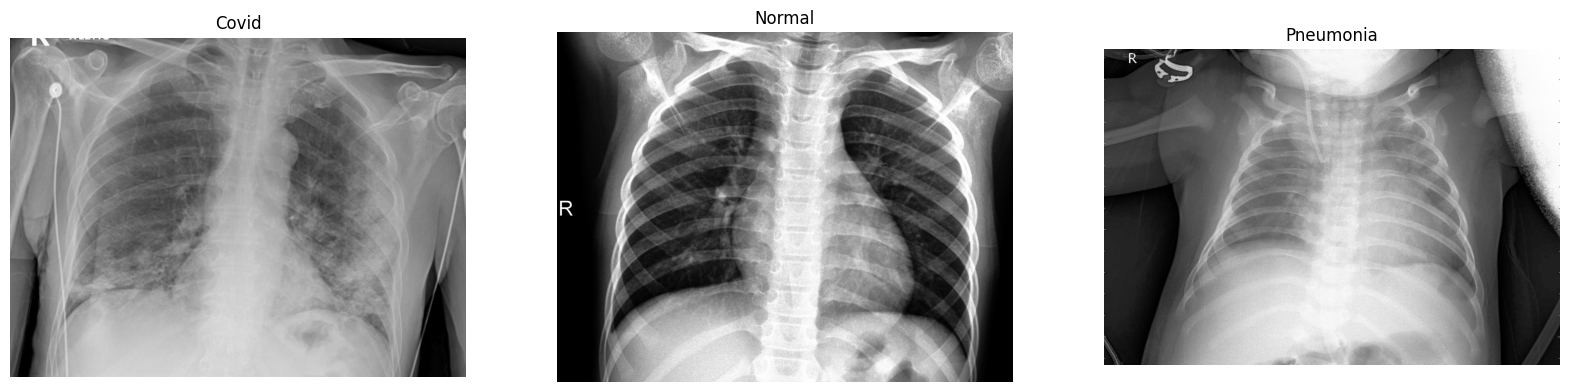

In [860]:
U.show_3_imgs(img1=original_C_img, name1="Covid", img2=original_N_img, name2="Normal", img3=original_P_img, name3="Pneumonia", width=20)

### Con filtro

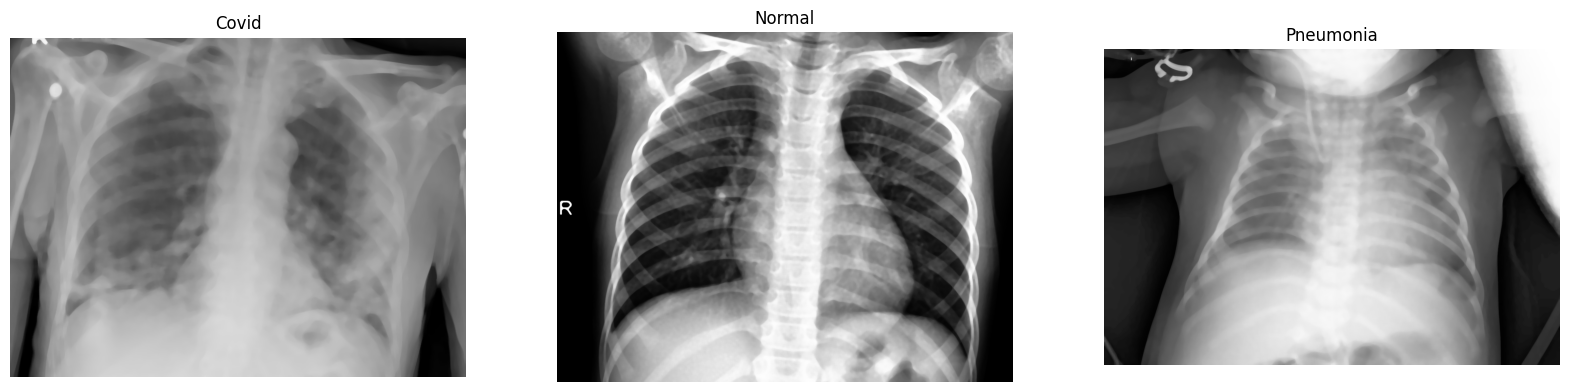

In [861]:
U.show_3_imgs(img1=median_C_img, name1="Covid", img2=median_N_img, name2="Normal", img3=median_P_img, name3="Pneumonia", width=20)

Diferencias observadas:
Es posible apreciar una difuminación pronunciada.

## Canny Edge Detection

In [862]:
minVal = 40
maxVal = 85
canny_edge_C_img = cv2.Canny(original_C_img, minVal, maxVal)
canny_edge_N_img = cv2.Canny(original_N_img, minVal, maxVal)
canny_edge_P_img = cv2.Canny(original_P_img, minVal, maxVal)

### Orignal

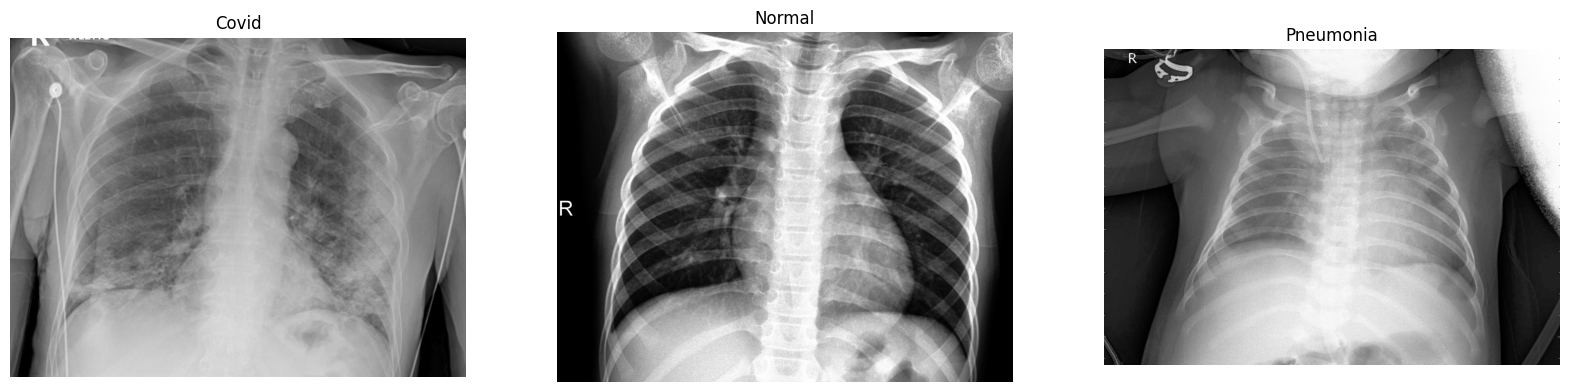

In [863]:
U.show_3_imgs(img1=original_C_img, name1="Covid", img2=original_N_img, name2="Normal", img3=original_P_img, name3="Pneumonia", width=20)

### Con filtro

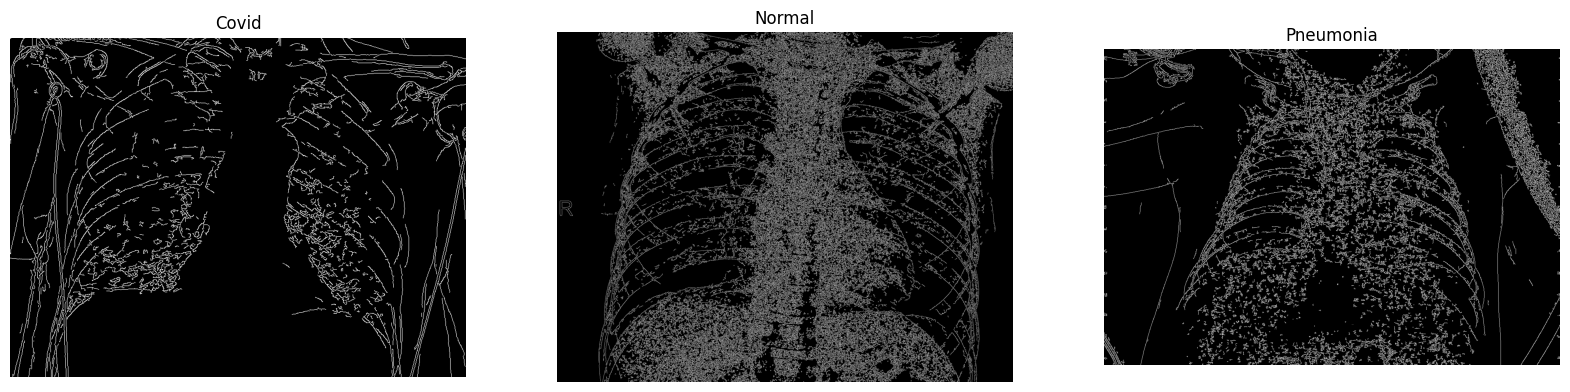

In [864]:
U.show_3_imgs(img1=canny_edge_C_img, name1="Covid", img2=canny_edge_N_img, name2="Normal", img3=canny_edge_P_img, name3="Pneumonia", width=20)

Diferencias observadas:
Es posible apreciar los bordes marcados, se elimina la carne de los pacientes y pierde los detalles de sombreado.

# Laplacian Filter

In [865]:
def laplacian_filter(img, ddepth=cv2.CV_16S, ksize=3):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction
    img = cv2.GaussianBlur(img,(5,5),5)

    laplacian_img = cv2.Laplacian(img, ddepth, ksize=ksize)
    return cv2.convertScaleAbs(laplacian_img)

ksize = 5

laplacian_C_img = laplacian_filter(original_C_img, ksize=ksize)
laplacian_N_img = laplacian_filter(original_N_img, ksize=ksize)
laplacian_P_img = laplacian_filter(original_P_img, ksize=ksize)

### Original

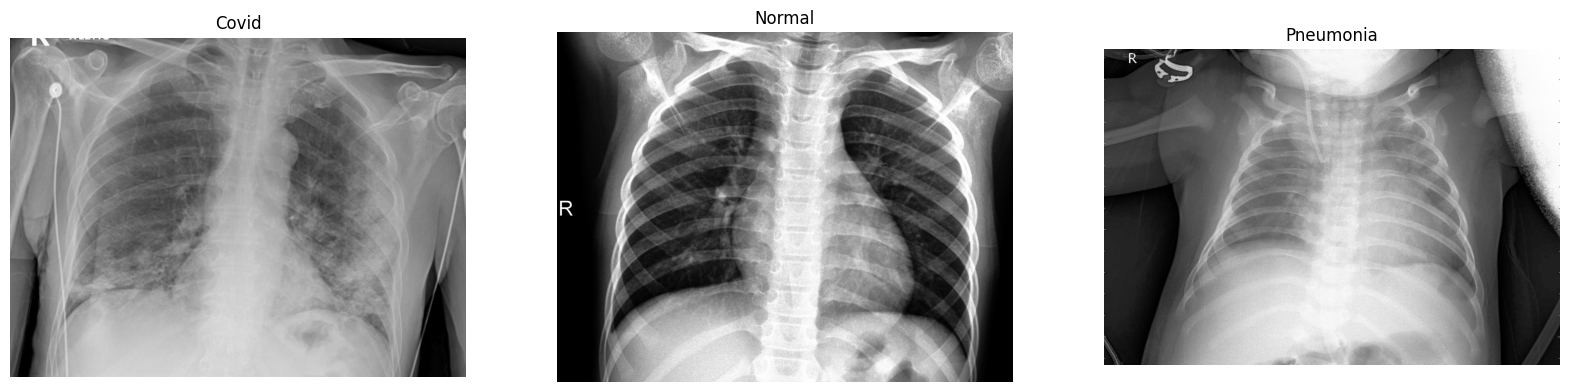

In [866]:
U.show_3_imgs(img1=original_C_img, name1="Covid", img2=original_N_img, name2="Normal", img3=original_P_img, name3="Pneumonia", width=20)

### Con filtro

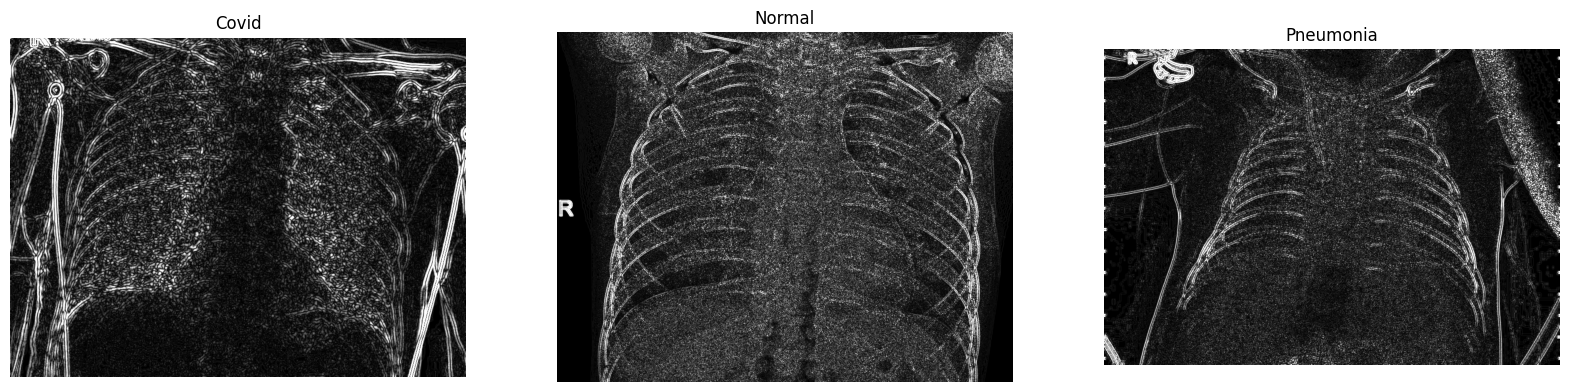

In [867]:
U.show_3_imgs(img1=laplacian_C_img, name1="Covid", img2=laplacian_N_img, name2="Normal", img3=laplacian_P_img, name3="Pneumonia", width=20)

Diferencias observadas:
Similar al Canny Edge pero conserva más detalles y es sensible al ruido.